In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Explore trip.csv and weathet.csv

In [2]:
dfTrip = pd.read_csv('trip.csv')
dfWeather = pd.read_csv('weather.csv')

In [3]:
dfTrip.shape

(669959, 11)

In [4]:
dfWeather.shape

(3665, 24)

In [5]:
dfTrip.head(6)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
5,4927,103,8/29/2013 18:54,Golden Gate at Polk,59,8/29/2013 18:56,Golden Gate at Polk,59,527,Subscriber,94109


In [6]:
dfWeather.head(6)

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107
5,9/3/2013,73.0,67.0,60.0,59.0,56.0,51.0,84.0,65.0,46.0,...,10.0,10.0,24.0,15.0,31.0,0,2.0,NaN,276.0,94107


In [8]:
dfTrip.isnull().sum()

id                       0
duration                 0
start_date               0
start_station_name       0
start_station_id         0
end_date                 0
end_station_name         0
end_station_id           0
bike_id                  0
subscription_type        0
zip_code              6619
dtype: int64

In [9]:
dfWeather.isn().sum()

date                                 0
max_temperature_f                    4
mean_temperature_f                   4
min_temperature_f                    4
max_dew_point_f                     54
mean_dew_point_f                    54
min_dew_point_f                     54
max_humidity                        54
mean_humidity                       54
min_humidity                        54
max_sea_level_pressure_inches        1
mean_sea_level_pressure_inches       1
min_sea_level_pressure_inches        1
max_visibility_miles                13
mean_visibility_miles               13
min_visibility_miles                13
max_wind_Speed_mph                   1
mean_wind_speed_mph                  1
max_gust_speed_mph                 899
precipitation_inches                 1
cloud_cover                          1
events                            3143
wind_dir_degrees                     1
zip_code                             0
dtype: int64

# Compute the daily trip number and average duration

In [10]:
# creat dfX
dfAll = pd.DataFrame(columns=['date','trip_num','trip_dur','trip_dur_avg',
                              'mean_temperature_f','mean_wind_speed_mph',
                             'events'])

In [10]:
# ignore time in 'start_date'
dfTrip['end_date'] = pd.to_datetime(dfTrip['end_date']).dt.date

# creat 'date' 
dfAll['date'] = pd.unique(dfTrip['end_date'])

In [11]:
dfAll = dfAll.fillna(0)
dfAll.head()

,date,trip_num,trip_dur,trip_dur_avg,mean_temperature_f,mean_wind_speed_mph,events
0,2013-08-29,0,0,0,0,0,0
1,2013-08-30,0,0,0,0,0,0
2,2013-08-31,0,0,0,0,0,0
3,2013-09-02,0,0,0,0,0,0
4,2013-09-01,0,0,0,0,0,0


In [12]:
# compute 'trip_num' and 'trip_dur'
for i in dfTrip.index:
    date = dfTrip.loc[i,'end_date']
    ind  = dfAll.index[dfAll['date']==date].tolist()[0]
    dfAll.loc[ind,'trip_num'] += 1 #compute 'trip_num'
    dur = dfTrip.loc[i,'duration']
    dfAll.loc[ind,'trip_dur'] += dur #compute 'trip_dur'
    

In [13]:
# compute 'trip_dur_avg'
dfAll['trip_dur_avg'] = dfAll['trip_dur']/dfAll['trip_num']

In [14]:
dfAll.head()

,date,trip_num,trip_dur,trip_dur_avg,mean_temperature_f,mean_wind_speed_mph,events
0,2013-08-29,742,760268,1024.619946,0,0,0
1,2013-08-30,713,1789207,2509.406732,0,0,0
2,2013-08-31,638,1986155,3113.095611,0,0,0
3,2013-09-02,658,2051061,3117.113982,0,0,0
4,2013-09-01,705,2336253,3313.834043,0,0,0


# Matching weather parameters to date of trips

In [15]:
# Sort dfAll and dfWeather by date
dfAll = dfAll.sort_values(by='date')
dfWeather = dfWeather.sort_values(by='date')

In [16]:
# asgin weather parameters to dfAll
j = -1
for i in dfAll.index:
    while 1:
        j += 1
        if pd.Timestamp(dfAll['date'][i])==pd.to_datetime(dfWeather['date'][j]):
            dfAll.loc[i,'mean_temperature_f']=dfWeather.loc[j,'mean_temperature_f']
            dfAll.loc[i,'mean_wind_speed_mph']=dfWeather.loc[j,'mean_wind_speed_mph']
            dfAll.loc[i,'events']=dfWeather.loc[j,'events']
            break

In [17]:
dfAll.head()

,date,trip_num,trip_dur,trip_dur_avg,mean_temperature_f,mean_wind_speed_mph,events
0,2013-08-29,742,760268,1024.619946,68.0,11.0,NaN
1,2013-08-30,713,1789207,2509.406732,69.0,13.0,NaN
2,2013-08-31,638,1986155,3113.095611,64.0,15.0,NaN
4,2013-09-01,705,2336253,3313.834043,66.0,13.0,NaN
3,2013-09-02,658,2051061,3117.113982,69.0,12.0,NaN


In [18]:
dfAll.to_csv('All.csv')

# Using Linear Regression

In [22]:
dfAll = pd.read_csv('All.csv',index_col = 0)

In [23]:

df_ohc = pd.get_dummies(dfAll, columns = ['events'])
df_ohc.head()

,date,trip_num,trip_dur,trip_dur_avg,mean_temperature_f,mean_wind_speed_mph,events_Fog,events_Fog-Rain,events_Rain,events_Rain-Thunderstorm,events_rain
0,2013-08-29,742,760268,1024.619946,68.0,11.0,0,0,0,0,0
1,2013-08-30,713,1789207,2509.406732,69.0,13.0,0,0,0,0,0
2,2013-08-31,638,1986155,3113.095611,64.0,15.0,0,0,0,0,0
4,2013-09-01,705,2336253,3313.834043,66.0,13.0,0,0,0,0,0
3,2013-09-02,658,2051061,3117.113982,69.0,12.0,0,0,0,0,0


In [34]:
X_df = df_ohc.drop(['date','trip_num','trip_dur_avg','trip_dur'],axis=1)
col_names = X_df.columns
X = np.array(X_df)
y_df = df_ohc[['trip_num','trip_dur_avg']]
y = np.array(y_df)
col_names

Index(['mean_temperature_f', 'mean_wind_speed_mph', 'events_Fog',
       'events_Fog-Rain', 'events_Rain', 'events_Rain-Thunderstorm',
       'events_rain'],
      dtype='object')

In [35]:
nsamples, nfeatures = X.shape
print("Num samples = {0:d}".format(nsamples))
print("Num features = {0:d}".format(nfeatures))

Num samples = 733
Num features = 7


In [36]:
from sklearn import linear_model
ns_train = 500
from sklearn import preprocessing
Xs = preprocessing.scale(X)
ys = preprocessing.scale(y)
X_tr = Xs[:ns_train,:] 
y_tr = ys[:ns_train] 
X_ts = Xs[ns_train:,:]
y_ts = ys[ns_train:]

In [37]:
regr = linear_model.LinearRegression()
regr.fit(X_tr,y_tr)

y_tr_pred = regr.predict(X_tr)
RSS_tr = np.mean((y_tr_pred-y_tr)**2)/(np.std(y_tr)**2)
print("Normalized training RSS = %f" % RSS_tr)

y_ts_pred = regr.predict(X_ts)
RSS_rel_ts = np.mean((y_ts_pred-y_ts)**2)/(np.std(y_ts)**2)
print("Normalized test RSS = {0:f}".format(RSS_rel_ts))


Normalized training RSS = 0.914310
Normalized test RSS = 1.050168


# Using LASSO Regression

In [ ]:
from sklearn import preprocessing
Xs = preprocessing.scale(X)
ys = preprocessing.scale(y)

In [42]:
import sklearn.model_selection
nfold = 10
kf = sklearn.model_selection.KFold(n_splits=nfold,shuffle=True)
nalpha = 100
alpha_test = np.logspace(-3,1,nalpha)
model = sklearn.linear_model.Lasso(warm_start=True)
RSSts = np.zeros((nalpha,nfold))
for isplit, Ind in enumerate(kf.split(Xs)):
    Itr, Its = Ind
    Xtr = Xs[Itr,:]
    ytr = ys[Itr]
    Xts = Xs[Its,:]
    yts = ys[Its]
    
    for it, a in enumerate(alpha_test):
        model.alpha = a
        model.fit(Xtr,ytr)
        yhat = model.predict(Xts)
        RSSts[it,isplit] = np.mean((yhat-yts)**2)



Text(0,0.5,'Test RSS')

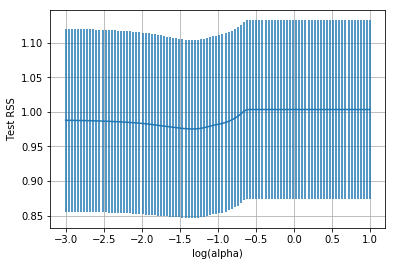

In [43]:
RSS_mean = np.mean(RSSts, axis=1)
RSS_std = np.std(RSSts, axis=1)/np.sqrt(nfold)
plt.errorbar(np.log10(alpha_test), RSS_mean, yerr=RSS_std)
plt.grid()
plt.xlabel('log(alpha)')
plt.ylabel('Test RSS')

In [44]:
imin = np.argmin(RSS_mean)
alpha_min = alpha_test[imin]
RSS_tgt = RSS_mean[imin] + RSS_std[imin]
iopt = np.where(RSS_mean <= RSS_tgt)[0][-1]
alpha_opt = alpha_test[iopt]
print("The optimal alpha= %12.4e" % alpha_opt)
print("Mean test RSS = %f" % RSS_mean[iopt])

The optimal alpha=   1.0000e+01
Mean test RSS = 1.003350
